In [118]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import numpy as np

In [214]:
ds = pd.read_csv('./data/processed/TERRACLIMATE_processed.csv')
ds.index = pd.to_datetime(ds.index)
ndvi = pd.read_csv('./data/csv/LANDSAT_NDVI_EVI_ikhnart_v1_long_2019-06-24.csv')
ndvi.index = pd.to_datetime(ndvi.img_date)

In [215]:
df = ds.groupby(['date']).agg('median')
ndvi_mu = ndvi.groupby(['img_date']).agg('median')
ndvi_mu.index = pd.to_datetime(ndvi_mu.index)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'img_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [216]:
'''
x = dsmu.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=dsmu.columns)
df.index = dsmu.index
'''
df.index = pd.to_datetime(df.index)
df = df['19851201':'20190901']

In [222]:
ts ='1m'
ndvi_resample = ndvi_mu.resample(ts).median()
var = 'pdsi'
ndvi_resample['abv'] = ndvi_resample['NDVI']
ndvi_resample['bel'] = ndvi_resample['NDVI']
ndvi_mean = np.mean(ndvi_resample.NDVI)
ndvi_resample.abv[ndvi_resample.abv<ndvi_mean] = ndvi_mean
ndvi_resample.bel[ndvi_resample.bel>ndvi_mean] = ndvi_mean
ndvi_resample.bel[np.isnan(ndvi_resample.bel)] = ndvi_mean
ndvi_resample.abv[np.isnan(ndvi_resample.abv)] = ndvi_mean

climate_resample = df[[var]].resample(ts).median()
climate_resample['abv'] = climate_resample[var]
climate_resample['bel'] = climate_resample[var]
climate_mean = np.mean(climate_resample[var])
climate_resample.abv[climate_resample.abv<climate_mean] = climate_mean
climate_resample.bel[climate_resample.bel>climate_mean] = climate_mean
climate_resample.bel[np.isnan(climate_resample.bel)] = climate_mean
climate_resample.abv[np.isnan(climate_resample.abv)] = climate_mean

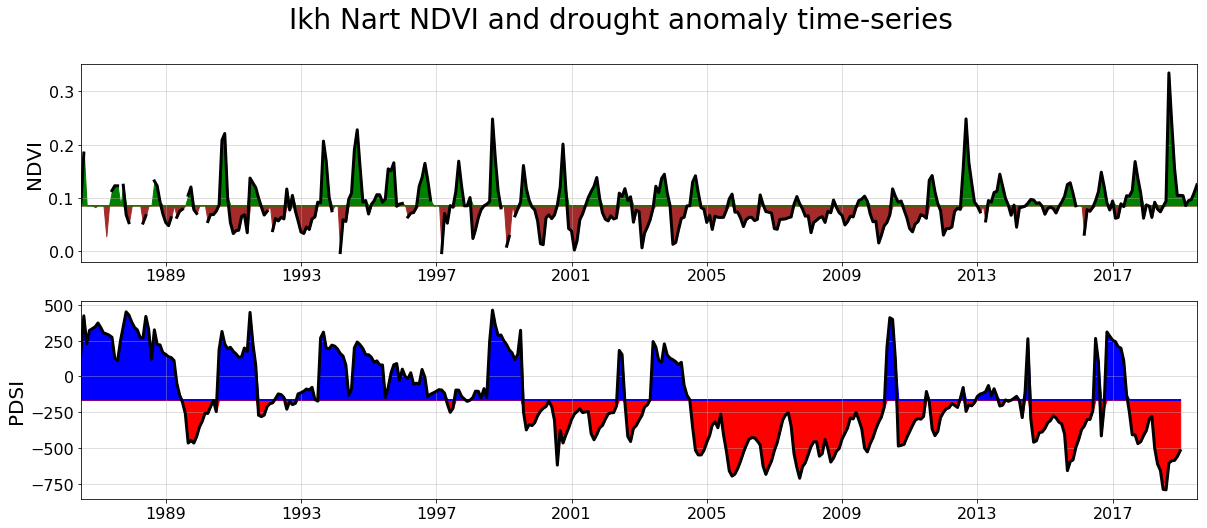

In [225]:
f, ax = plt.subplots(2,1,figsize=(20,8))
ax[0].plot(ndvi_resample.index, ndvi_resample['NDVI'], \
           color='black', lw=3)
ax[1].plot(climate_resample.index, climate_resample[var],\
           color='black', lw=3)
ax[0].fill_between(ndvi_resample.index, \
                   ndvi_mean, \
                   ndvi_resample['bel'], color='brown')
ax[0].fill_between(ndvi_resample.index, \
                   ndvi_mean, \
                   ndvi_resample['abv'], color='green')
ax[0].grid(alpha=0.5)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].set_ylabel('NDVI', fontsize=20)
ax[1].fill_between(climate_resample.index, \
                   climate_mean, \
                   climate_resample['bel'], color='red')
ax[1].fill_between(climate_resample.index, \
                   climate_mean, \
                   climate_resample['abv'], color='blue')

ax[1].grid(alpha=0.5)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].set_ylabel('PDSI', fontsize=20)
ax[0].set_xlim(left=ndvi_resample.index[0],right=ndvi_resample.index[-1])
ax[1].set_xlim(left=ndvi_resample.index[0],right=ndvi_resample.index[-1])
f.suptitle('Ikh Nart NDVI and drought anomaly time-series',\
          fontsize=28)
f.savefig('./out/ikhnart_NDVI_climate_series.png', dpi=500, bbox_inches='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e3d0d5588>],
      dtype=object)

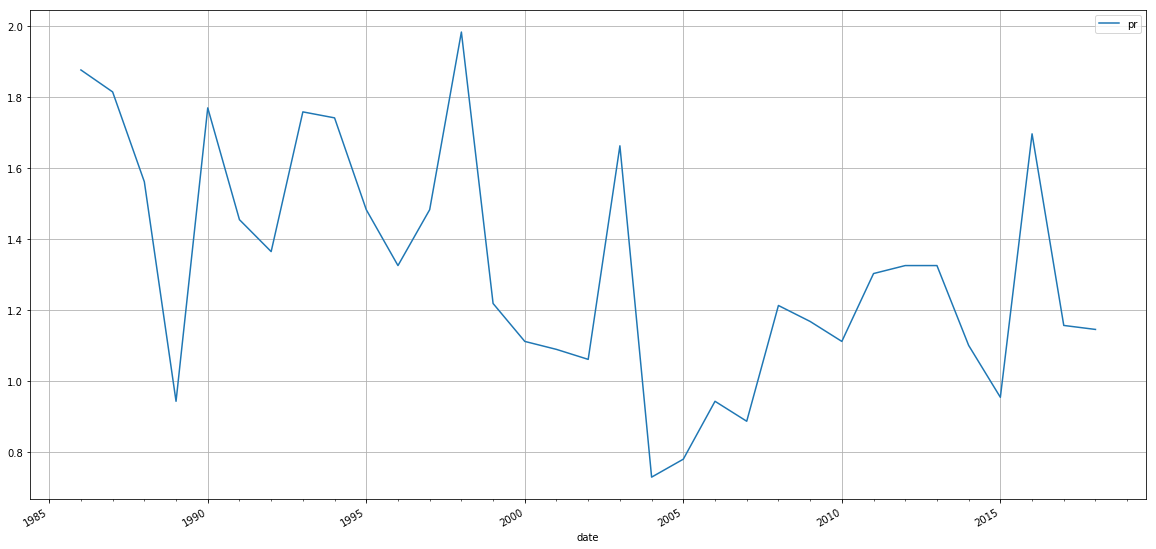

In [142]:
df[['pr']].resample('1y').sum().plot(subplots=True,figsize=(20,10),\
                                                     grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7efd0e2a20>],
      dtype=object)

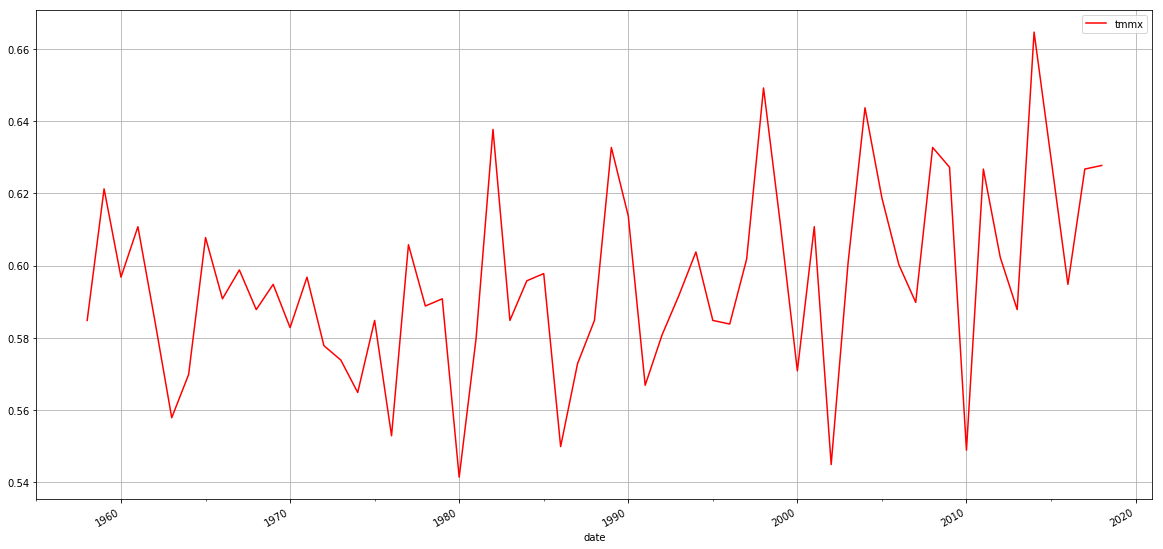

In [182]:
df[['tmmx']].resample('1y').median().plot(subplots=True,figsize=(20,10),\
                                                     grid=True, color='red')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7efadadda0>,
      dtype=object)

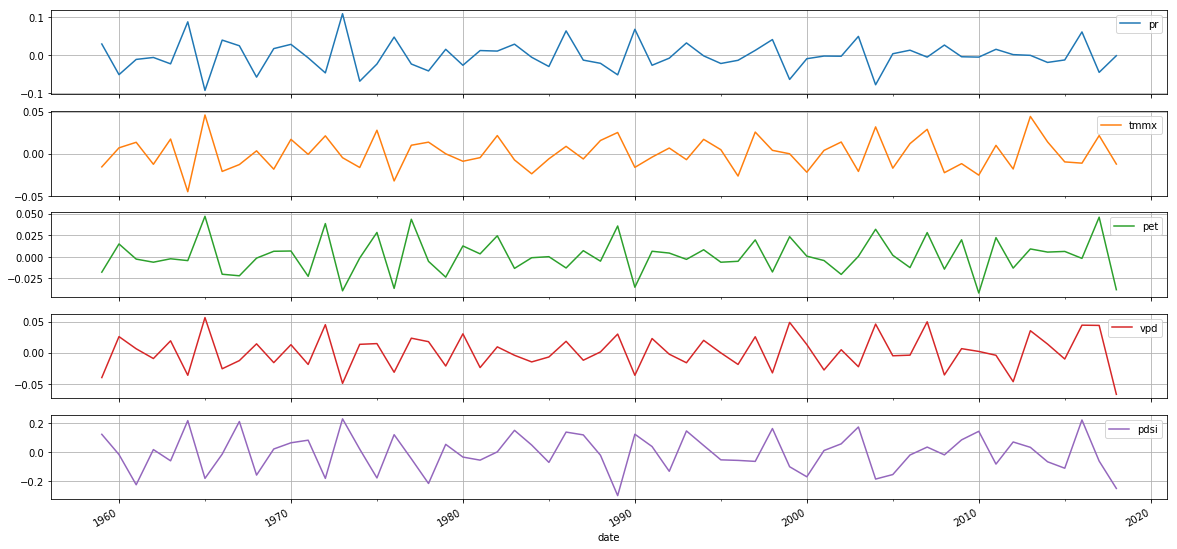

In [178]:
df[['pr','tmmx','pet','vpd','pdsi']].resample('1y').mean().diff().plot(subplots=True,figsize=(20,10),\
                                                     grid=True)

,id,PlotKey,aet,def,pdsi,pet,pr,ro,soil,srad,swe,tmmn,tmmx,vap,vpd,vs
date,,,,,,,,,,,,,,,,
1958-01-01,0.000000,0.0,0.000000,0.000000,0.516476,0.000000,0.000000,0.00,1.000000,0.076856,0.083333,0.110647,0.124,0.016644,0.027907,0.553444
1958-02-01,0.000166,0.0,0.000000,0.000000,0.507341,0.000000,0.000000,0.00,1.000000,0.236681,0.083333,0.146138,0.210,0.035286,0.041860,0.441805
1958-03-01,0.000333,0.0,0.000000,0.000000,0.526591,0.000000,0.022472,0.00,1.000000,0.475109,0.250000,0.298539,0.386,0.065912,0.106977,0.726841
1958-04-01,0.000499,0.0,0.080494,0.447249,0.513866,0.489962,0.044944,0.00,0.890625,0.677729,0.000000,0.494781,0.624,0.159121,0.279070,0.914489
1958-05-01,0.000665,0.0,0.076381,0.805149,0.498206,0.793499,0.067416,0.00,0.812500,0.910480,0.000000,0.716075,0.788,0.317577,0.497674,0.629454
1958-06-01,0.000832,0.0,0.170388,0.796567,0.459706,0.823136,0.168539,0.25,0.734375,0.844541,0.000000,0.874739,0.914,0.633156,0.674419,0.339667
1958-07-01,0.000998,0.0,0.927145,0.374558,0.740294,0.732314,0.932584,1.00,0.687500,0.743231,0.000000,0.918580,0.920,0.891478,0.558140,0.218527
1958-08-01,0.001165,0.0,0.371328,0.523978,0.696574,0.646750,0.370787,0.50,0.625000,0.745415,0.000000,0.878914,0.858,0.707057,0.506977,0.128266
1958-09-01,0.001331,0.0,0.153937,0.434124,0.684176,0.474665,0.157303,0.25,0.593750,0.519214,0.000000,0.729645,0.766,0.465379,0.372093,0.325416
